In [3]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"litingku","key":"eeea8d9b59ad8f441aecf3374c6b6452"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           5314        118  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          11384        242  0.9411765        
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           3345         47  1.0              
michaelmatta0/amazon-cell-phones-cleaned-scraped-data  

In [6]:
!kaggle datasets list -s DR_2000
!kaggle datasets download -d zhizhid/dr-2000

ref              title    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------  -------  ----  -------------------  -------------  ---------  ---------------  
zhizhid/dr-2000  DR_2000   2GB  2019-08-31 23:30:36           1098         10  0.3125           
Dataset URL: https://www.kaggle.com/datasets/zhizhid/dr-2000
License(s): unknown
100% 1.89G/1.90G [00:15<00:00, 146MB/s]
100% 1.90G/1.90G [00:15<00:00, 133MB/s]


In [7]:
!unzip /content/dr-2000.zip

Archive:  /content/dr-2000.zip
  inflating: data/dr/10017_left.jpeg  
  inflating: data/dr/10017_right.jpeg  
  inflating: data/dr/1002_left.jpeg  
  inflating: data/dr/1002_right.jpeg  
  inflating: data/dr/10030_left.jpeg  
  inflating: data/dr/10030_right.jpeg  
  inflating: data/dr/10043_left.jpeg  
  inflating: data/dr/10043_right.jpeg  
  inflating: data/dr/10047_left.jpeg  
  inflating: data/dr/10047_right.jpeg  
  inflating: data/dr/10085_left.jpeg  
  inflating: data/dr/10085_right.jpeg  
  inflating: data/dr/1008_left.jpeg  
  inflating: data/dr/1008_right.jpeg  
  inflating: data/dr/10109_left.jpeg  
  inflating: data/dr/10109_right.jpeg  
  inflating: data/dr/10112_left.jpeg  
  inflating: data/dr/10120_left.jpeg  
  inflating: data/dr/10120_right.jpeg  
  inflating: data/dr/10125_left.jpeg  
  inflating: data/dr/10125_right.jpeg  
  inflating: data/dr/10131_left.jpeg  
  inflating: data/dr/10131_right.jpeg  
  inflating: data/dr/10135_left.jpeg  
  inflating: data/dr/10135

## Using the fastai library in computer vision

In [8]:
from fastai.vision.all import *

In [9]:
files_path = Path('/content/data')
dls = ImageDataLoaders.from_folder(files_path, valid_pct=0.2, seed=42, item_tfms=Resize(64), bs = 64)

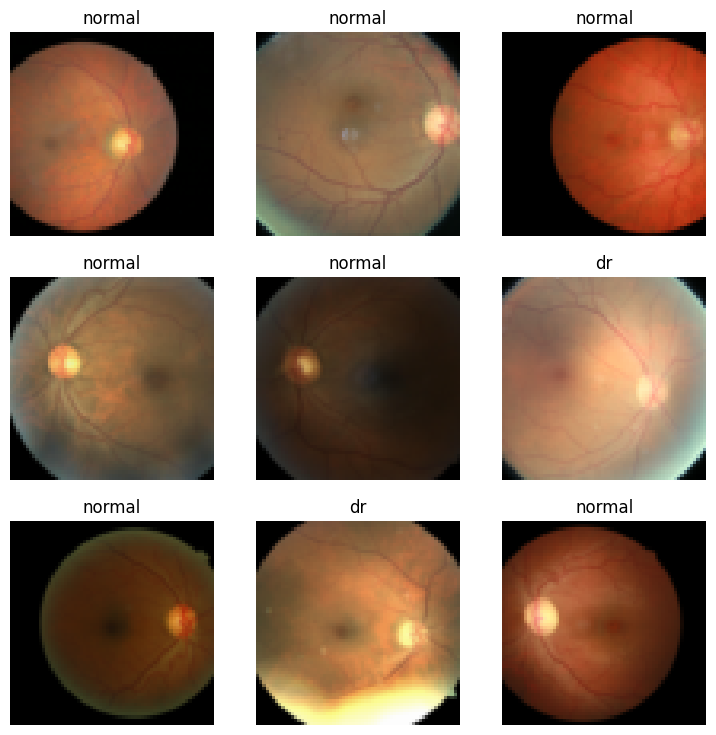

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 86.7MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0005754399462603033, slide=0.0020892962347716093)

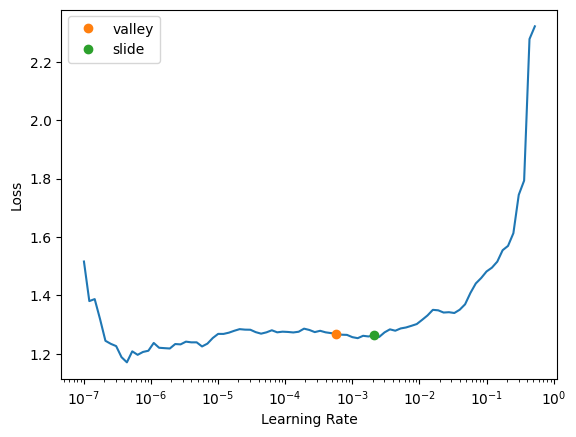

In [ ]:
# image size 64*64 batch 64
learn.lr_find(suggest_funcs=(valley, slide))
# /usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
#  state = torch.load(file, map_location=device, **torch_load_kwargs)
#  SuggestedLRs(valley=0.0005754399462603033, slide=0.0020892962347716093)

In [ ]:
learn.fine_tune(2, 0.0007)

epoch,train_loss,valid_loss,error_rate,time
0,1.303097,1.002386,0.495000,04:29


epoch,train_loss,valid_loss,error_rate,time
0,1.189063,1.077257,0.507500,04:17
1,1.160092,1.032283,0.500000,03:59


In [ ]:
dls = ImageDataLoaders.from_folder(files_path, valid_pct=0.2, seed=42, item_tfms=Resize(128), bs = 64)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0003311311302240938, slide=0.007585775572806597)

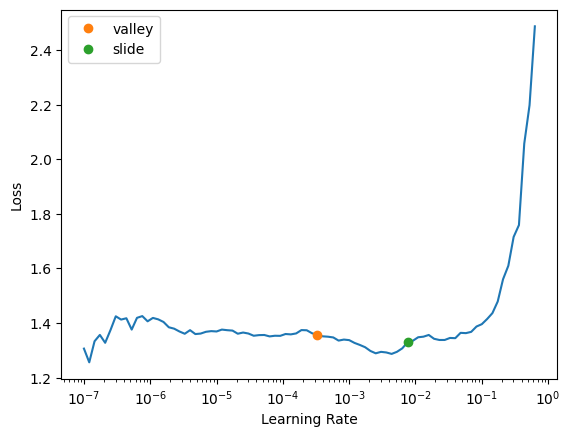

In [ ]:
# image size 128*128 batch 64
learn.lr_find(suggest_funcs=(valley, slide))
#/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
#  state = torch.load(file, map_location=device, **torch_load_kwargs)
# SuggestedLRs(valley=0.0003311311302240938, slide=0.007585775572806597)

In [ ]:
learn.fine_tune(4, 0.0007)

epoch,train_loss,valid_loss,error_rate,time
0,1.277370,0.974176,0.442500,03:37


epoch,train_loss,valid_loss,error_rate,time
0,1.064192,0.944074,0.445000,03:35
1,1.027377,1.061872,0.435000,03:36
2,0.987588,1.065084,0.447500,03:42
3,0.901779,1.038294,0.435000,03:35


In [ ]:
dls = ImageDataLoaders.from_folder(files_path, valid_pct=0.2, seed=42, item_tfms=Resize(256), bs = 64)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

SuggestedLRs(valley=0.0014454397605732083, slide=0.002511886414140463)

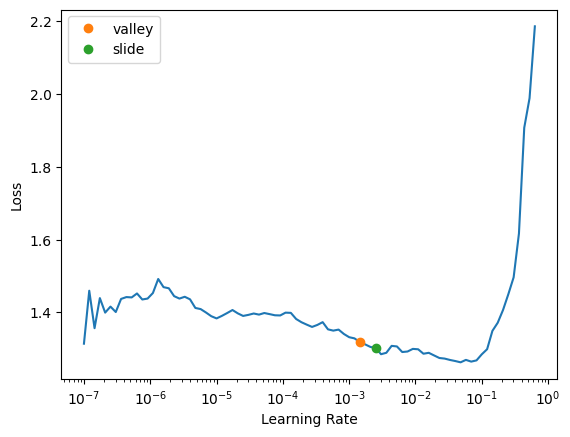

In [ ]:
# image size 256*256 batch 64
learn.lr_find(suggest_funcs=(valley, slide))
# SuggestedLRs(valley=0.0014454397605732083, slide=0.002511886414140463)

In [ ]:
learn.fine_tune(2, 0.002)

epoch,train_loss,valid_loss,error_rate,time
0,1.320430,0.891028,0.355000,04:04


epoch,train_loss,valid_loss,error_rate,time
0,0.962818,0.979188,0.372500,04:10
1,0.823034,0.902484,0.377500,04:02


In [12]:
dls = ImageDataLoaders.from_folder(files_path, valid_pct=0.2, seed=42, item_tfms=Resize(512), bs = 64)

In [13]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.002511886414140463, slide=0.002511886414140463)

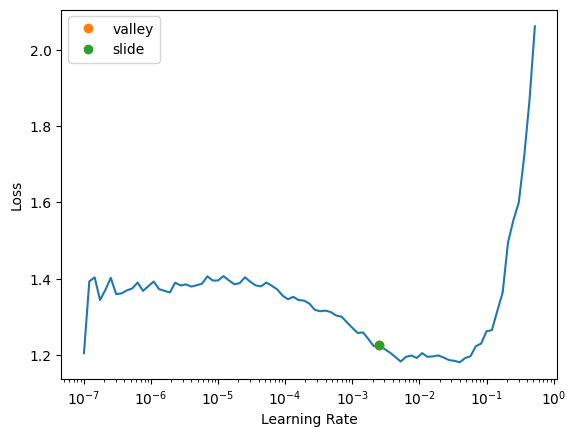

In [14]:
# image size 512*512 batch 64
learn.lr_find(suggest_funcs=(valley, slide))

In [15]:
learn.fine_tune(2, 0.0025)

epoch,train_loss,valid_loss,error_rate,time
0,1.212001,0.811337,0.352500,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.897579,0.789577,0.315000,00:58
1,0.763701,0.767036,0.295000,01:00


In [16]:
dls = ImageDataLoaders.from_folder(files_path, valid_pct=0.2, seed=42, item_tfms=Resize(512), bs = 32)

In [17]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

SuggestedLRs(valley=0.0063095735386013985, slide=0.002511886414140463)

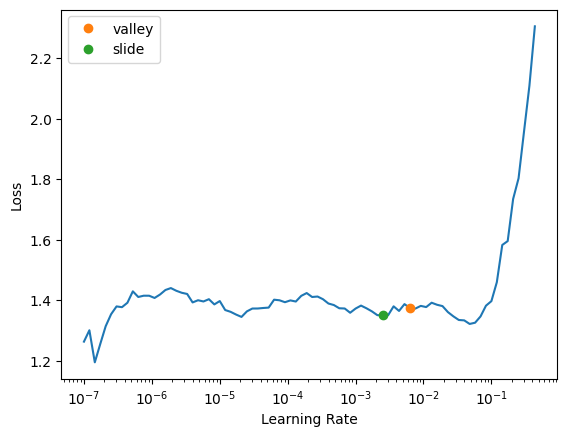

In [18]:
# image size 512*512 batch 32
learn.lr_find(suggest_funcs=(valley, slide))

In [20]:
learn.fine_tune(4, 0.003)

epoch,train_loss,valid_loss,error_rate,time
0,0.529767,0.959933,0.392500,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.497016,0.649099,0.265000,00:50
1,0.491375,0.741121,0.267500,00:50
2,0.352783,0.690398,0.272500,00:50
3,0.239471,0.657930,0.252500,00:51


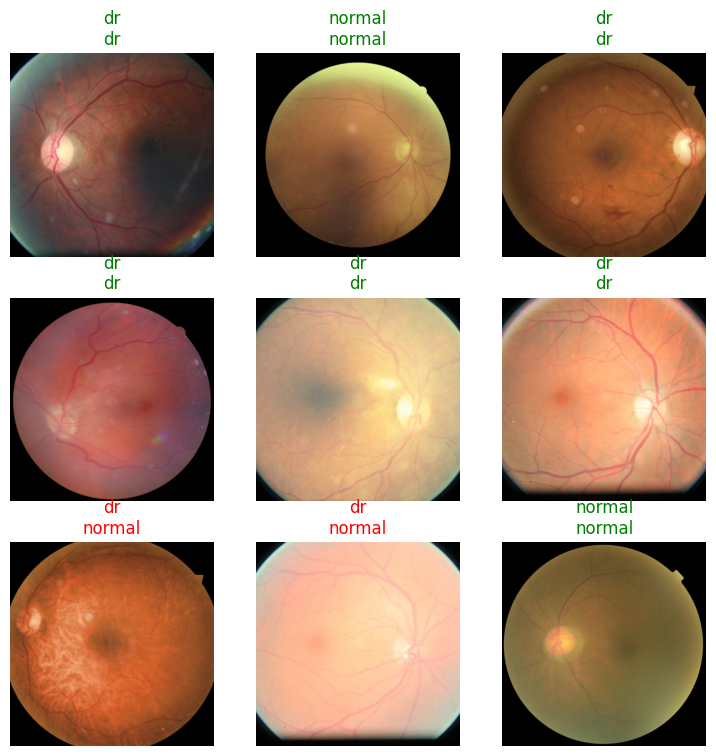

In [22]:
learn.show_results()

## Conclusion & Result

Data:

The dataset with 2000 images has randomly divided into training and validation sets using `ImageDataLoaders.from_folder()` with parameter `valid_pct = 0.2` so that the training set includes 80% images and validation set includes the other 20%.

Model:

I tried `resnet50` for 2-4 epochs with different parameters and used `learn.lr_find(suggest_funcs=(valley, slide))` to find the best interval of learning rate and got results of the converged error rate below:

1. image size = 64, batch size = 64: error rate = 0.50 with lr in [0.00058, 0.0021];

2. image size = 128, batch size = 64: error rate = 0.44 with lr in [0.00033, 0.0076];

3. image size = 256, batch size = 64: error rate = 0.38 with lr in [0.0014, 0.0025];

4. image size = 512, batch size = 64: error rate = 0.30 with lr in [0.0025, slide=0.0025].

Actually from the 4th one, the error started to decrease below 30%, but because according to `learn.lr_find(suggest_funcs=(valley, slide))`, both the valley and slide suggested learning rates are the same `0.0025`, it seems to be a but odd, so I thought to reduce the batch size from 64 to 32 and do the following

5. image size = 512, batch size = 32: error rate = 0.30 with lr in [0.0063, 0.0025].

And found that when using the learning rate `0.003` with 4 epochs, the error rate will be converged around 26% (between 25% to 27%)

Result:

It appears that increasing the image size (which provides more information) and reducing the batch size (for more frequent updates) can lead to a decrease in the error rate. This suggests that higher image resolution and more frequent weight updates improve model performance.